### CLASSIFICATION EXAMPLE

In [12]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [13]:
# LOAD DATASET
data_set_details = load_breast_cancer()

In [14]:
# GET INDEPENDENT AND DEPENDENT VARIABLES
feature_columns = data_set_details['feature_names']
target_column = 'Target'
predicted_column = 'Predicted'
X = pd.DataFrame(data_set_details['data'], columns=feature_columns)
y = pd.DataFrame(data_set_details['target'], columns=[target_column])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# SPLIT THE DATA IN TRAIN AND TEST
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2023)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
# FIT THE MODEL
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
# PREPARE THE MODEL OUTPUT
train_output = pd.concat([x_train, y_train], axis=1)
train_output[predicted_column] = model.predict(x_train)
train_output[f'{predicted_column}_Probability'] = model.predict_proba(x_train).tolist()
test_output = pd.concat([x_test, y_test], axis=1)
test_output[predicted_column] = model.predict(x_test)
test_output[f'{predicted_column}_Probability'] = model.predict_proba(x_test).tolist()

## USE autoEval package to evaluate the model.

In [21]:
from autoEval import autoevaluatemodel


 PERFORMANCE METRICS :
{'train_metrics': {'train_accuracy_score': 0.9346733668341709, 'train_precision_score': 0.9367588932806324, 'train_recall_score': 0.9595141700404858, 'train_f1_score': 0.9480000000000001}, 'test_metrics': {'test_accuracy_score': 0.9707602339181286, 'test_precision_score': 0.972972972972973, 'test_recall_score': 0.9818181818181818, 'test_f1_score': 0.9773755656108598}}

 VISUALIZE REPORTS :


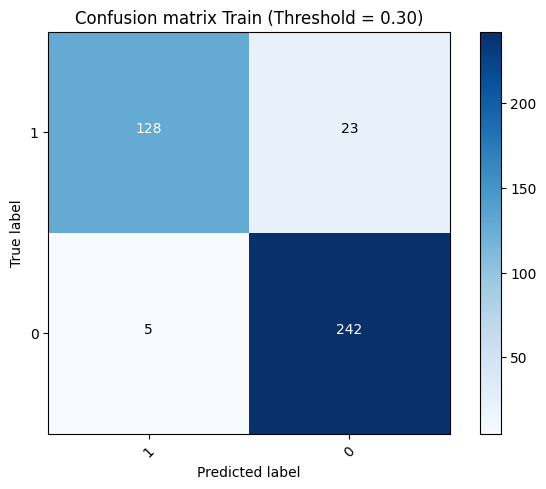

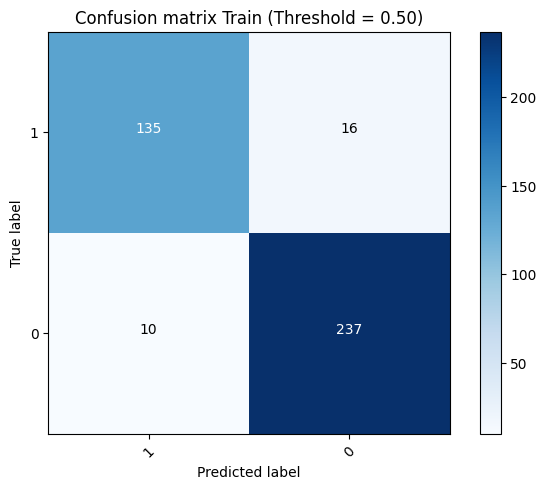

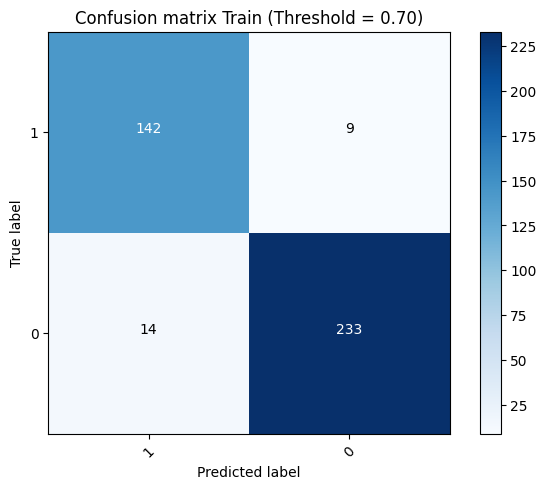

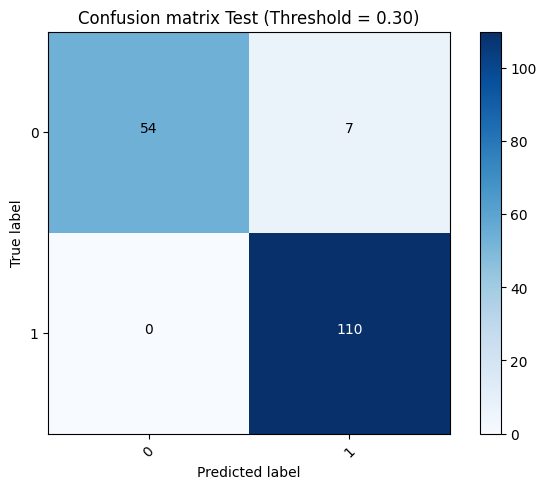

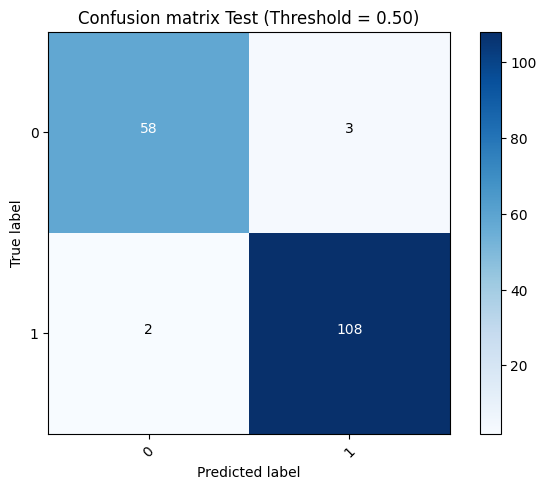

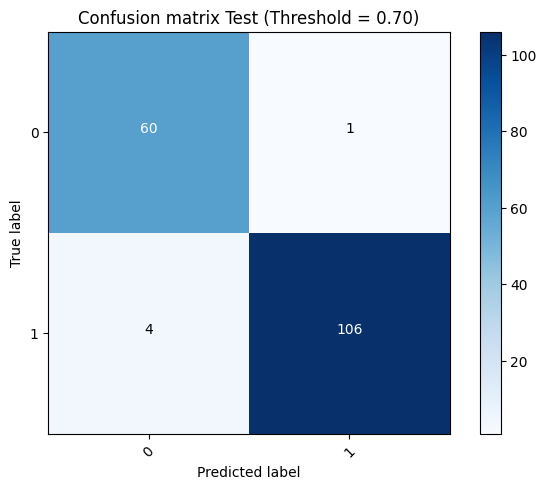


 FAIRNESS REPORT :
Checking fairness for Target
Checking fairness for Predicted
{'Target_bias_report': {'1_bias_report': {'train_metrics': {'train_accuracy_score': 0.9595141700404858, 'train_precision_score': 1.0, 'train_recall_score': 0.9595141700404858, 'train_f1_score': 0.9793388429752067}, 'test_metrics': {'test_accuracy_score': 0.9818181818181818, 'test_precision_score': 1.0, 'test_recall_score': 0.9818181818181818, 'test_f1_score': 0.9908256880733944}}, '0_bias_report': {'train_metrics': {'train_accuracy_score': 0.8940397350993378, 'train_precision_score': 0.0, 'train_recall_score': 0.0, 'train_f1_score': 0.0}, 'test_metrics': {'test_accuracy_score': 0.9508196721311475, 'test_precision_score': 0.0, 'test_recall_score': 0.0, 'test_f1_score': 0.0}}}, 'Predicted_bias_report': {'1_bias_report': {'train_metrics': {'train_accuracy_score': 0.9367588932806324, 'train_precision_score': 0.9367588932806324, 'train_recall_score': 1.0, 'train_f1_score': 0.9673469387755103}, 'test_metrics': {

In [22]:
autoevaluatemodel.auto_evaluate_model(
    model, 
    train_output, 
    test_output,
    feature_columns, 
    target_column, 
    predicted_column,
    "classification")